In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#to import first execute this command in the bash
# cp drive/MyDrive/fabric_classification/Fabric_Classification/my_utils.py .
import my_utils

2.8.0
7881

Acrylic : 48
Artificial_fur : 4
Artificial_leather : 12
Blended : 1645
Chenille : 52
Corduroy : 96
Cotton : 2352
Crepe : 104
Denim : 648
Felt : 16
Fleece : 132
Fur : 0
Leather : 64
Linen : 76
Lut : 16
Nylon : 228
Polyester : 904
Satin : 96
Silk : 200
Suede : 20
Terrycloth : 120
Unclassified : 492
Utilities : 4
Velvet : 44
Viscose : 148
Wool : 360


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

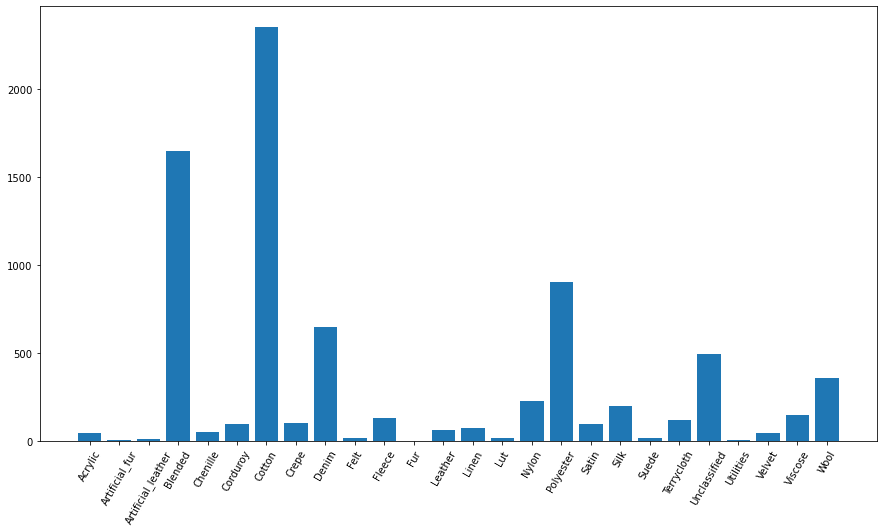

In [ ]:
#based of https://www.tensorflow.org/tutorials/load_data/images
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import re

print(tf.__version__)

import pathlib

path = "/content/drive/MyDrive/fabric_classification/Fabrics"
data_dir = pathlib.Path(path)

subfiles = "/*/*.png"

image_count = len(list(data_dir.glob('*'+subfiles)))
print(str(image_count) + "\n")

Acrylic = list(data_dir.glob('Acrylic'+subfiles))
Artificial_fur = list(data_dir.glob('Artificial_fur'+subfiles))
Artificial_leather = list(data_dir.glob('Artificial_leather'+subfiles))
Blended = list(data_dir.glob('Blended'+subfiles))
Chenille = list(data_dir.glob('Chenille'+subfiles))
Corduroy = list(data_dir.glob('Corduroy'+subfiles))
Cotton = list(data_dir.glob('Cotton'+subfiles))
Crepe = list(data_dir.glob('Crepe'+subfiles))
Denim = list(data_dir.glob('Denim'+subfiles))
Felt = list(data_dir.glob('Felt'+subfiles))
Fleece = list(data_dir.glob('Fleece'+subfiles))
Fur = list(data_dir.glob('Fur'+subfiles))
Leather = list(data_dir.glob('Leather'+subfiles))
Linen = list(data_dir.glob('Linen'+subfiles))
Lut = list(data_dir.glob('Lut'+subfiles))
Nylon = list(data_dir.glob('Nylon'+subfiles))
Polyester = list(data_dir.glob('Polyester'+subfiles))
Satin = list(data_dir.glob('Satin'+subfiles))
Silk = list(data_dir.glob('Silk'+subfiles))
Suede = list(data_dir.glob('Suede'+subfiles))
Terrycloth = list(data_dir.glob('Terrycloth'+subfiles))
Unclassified = list(data_dir.glob('Unclassified'+subfiles))
Utilities = list(data_dir.glob('Utilities'+subfiles))
Velvet = list(data_dir.glob('Velvet'+subfiles))
Viscose = list(data_dir.glob('Viscose'+subfiles))
Wool = list(data_dir.glob('Wool'+subfiles))

fabrics = {'Acrylic' : Acrylic, 
           'Artificial_fur' : Artificial_fur,
           'Artificial_leather' : Artificial_leather,
           'Blended' : Blended,
           'Chenille' : Chenille,
           'Corduroy' : Corduroy,
           'Cotton' : Cotton,
           'Crepe' : Crepe,
           'Denim' : Denim,
           'Felt' : Felt,
           'Fleece' : Fleece,
           'Fur' : Fur,
           'Leather' : Leather,
           'Linen' : Linen,
           'Lut' : Lut,
           'Nylon' : Nylon,
           'Polyester' : Polyester,
           'Satin' : Satin,
           'Silk' : Silk,
           'Suede' : Suede,
           'Terrycloth' : Terrycloth,
           'Unclassified' : Unclassified,
           'Utilities' : Utilities,
           'Velvet' : Velvet,
           'Viscose' : Viscose,
           'Wool' : Wool}

farbic_names = []
fabric_counts = []
for fabric in list(fabrics.keys()):
    farbic_names.append(fabric)
    fabric_counts.append(len(fabrics[fabric]))
    #print(f"{fabric} : {len(fabrics[fabric])}")

fabric_dict = {
    'Fabric' : farbic_names,
    'Count' : fabric_counts
}
                  
import pandas as pd
import matplotlib.pyplot as plt

fabric_df = pd.DataFrame(fabric_dict)

plt.figure(figsize=(15,8))
plt.bar(x=fabric_df['Fabric'],
        height=fabric_df['Count'])
plt.xticks(rotation=60)

In [ ]:
batch_size = 32
img_height = 400
img_width = 400

train_ds, val_ds, class_names = my_utils.generate_ds(data_dir, batch_size, img_height, img_width)

print(class_names)

Found 7885 files belonging to 26 classes.
Using 6308 files for training.
Found 7885 files belonging to 26 classes.
Using 1577 files for validation.
['Acrylic', 'Artificial_fur', 'Artificial_leather', 'Blended', 'Chenille', 'Corduroy', 'Cotton', 'Crepe', 'Denim', 'Felt', 'Fleece', 'Fur', 'Leather', 'Linen', 'Lut', 'Nylon', 'Polyester', 'Satin', 'Silk', 'Suede', 'Terrycloth', 'Unclassified', 'Utilities', 'Velvet', 'Viscose', 'Wool']


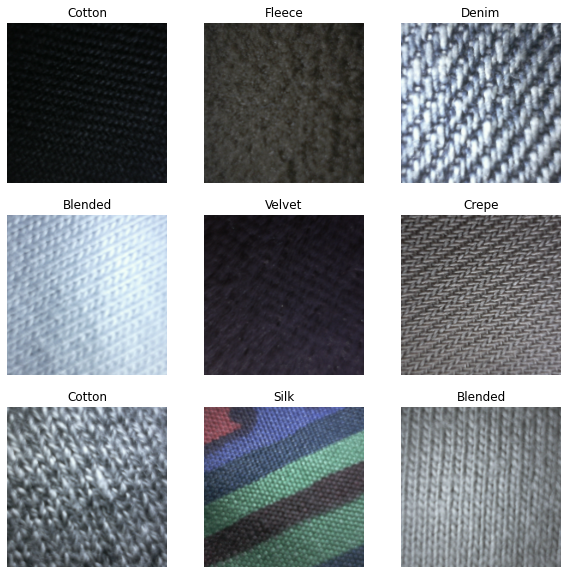

In [ ]:
my_utils.display_image(train_ds)

In [ ]:
#based of https://www.tensorflow.org/tutorials/load_data/images
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
#X = (32, 400, 400, 3) 32 images per batch, 400x400 image size, color channels (r,g,b)
#Y = (32,)